# Home Assignment No. 3

To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.


In [1]:
# Your imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from GPy.kern import RBF, Poly, StdPeriodic, White, Linear
from GPy.models import GPRegression
from sklearn.metrics import r2_score
#Task 2
#2.1
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
#2.2
from sklearn.model_selection import cross_val_score
#3.2
from sklearn.utils import resample
from scipy.stats import norm
from tqdm import tqdm
#4
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import VotingClassifier

## Task 1 - Gaussian Processes (1 pt.)

In the following exercise, you will need to fit the gaussian process with different kernels on the ```elecricity_consumption_FR.csv``` time series data. We have already loaded and prepared the train/test datasets for you below.

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

**The task**:
* Normalize the target value by fitting a transformation on the train (use ```sklearn.preprocessing.StandardScaler```)
* Plot the resulting target against the time index.
* Plot mean and confidence interval of the prediction. 
* Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
* Estimate the prediction error with `r2_score`. R2-score accepted > 0.7 on test sample.

In [7]:
# ! pip install GPy==1.9.9

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\bacla\Anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\bacla\\AppData\\Local\\Temp\\pip-install-amz5f_qv\\gpy_7fef2575b8a34d3fbe0b15a383b700ef\\setup.py'"'"'; __file__='"'"'C:\\Users\\bacla\\AppData\\Local\\Temp\\pip-install-amz5f_qv\\gpy_7fef2575b8a34d3fbe0b15a383b700ef\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\bacla\AppData\Local\Temp\pip-wheel-d9p3l0q3'
       cwd: C:\Users\bacla\AppData\Local\Temp\pip-install-amz5f_qv\gpy_7fef2575b8a34d3fbe0b15a383b700ef\
  Complete output (316 lines):
  C:\Users\bacla\Anaconda3\lib\site-packages\setuptools\dist.py:717: UserWarning: Usage of dash-separated 'upload-dir' will n


  Running setup.py clean for GPy
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102565 sha256=3fe4a7f72dc354093bef1c3f20d9a8220b030596f95ac501f636f076af74bf80
  Stored in directory: c:\users\bacla\appdata\local\pip\cache\wheels\9c\5f\9b\c4273ae8f869387214be2b99598d1b71dbf00672576cb85e74
Successfully built paramz
Failed to build GPy
    Running setup.py install for GPy: started
    Running setup.py install for GPy: finished with status 'error'



  copying GPy\mappings\piecewise_linear.py -> build\lib.win-amd64-3.9\GPy\mappings
  copying GPy\mappings\__init__.py -> build\lib.win-amd64-3.9\GPy\mappings
  creating build\lib.win-amd64-3.9\GPy\examples
  copying GPy\examples\classification.py -> build\lib.win-amd64-3.9\GPy\examples
  copying GPy\examples\dimensionality_reduction.py -> build\lib.win-amd64-3.9\GPy\examples
  copying GPy\examples\non_gaussian.py -> build\lib.win-amd64-3.9\GPy\examples
  copying GPy\examples\regression.py -> build\lib.win-amd64-3.9\GPy\examples
  copying GPy\examples\state_space.py -> build\lib.win-amd64-3.9\GPy\examples
  copying GPy\examples\__init__.py -> build\lib.win-amd64-3.9\GPy\examples
  creating build\lib.win-amd64-3.9\GPy\testing
  copying GPy\testing\cython_tests.py -> build\lib.win-amd64-3.9\GPy\testing
  copying GPy\testing\ep_likelihood_tests.py -> build\lib.win-amd64-3.9\GPy\testing
  copying GPy\testing\examples_tests.py -> build\lib.win-amd64-3.9\GPy\testing
  copying GPy\testing\fit

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('elecricity_consumption_FR.csv')

In [7]:
data.dropna(inplace=True)

In [8]:
y = np.array(data.values)
X = np.array(data.index)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)


Normalize the target value by fitting a transformation on the train (use sklearn.preprocessing.StandardScaler)

In [10]:
### BEGIN SOLUTION (do not delete this comment!)
scaler = StandardScaler()
y_train_norm = scaler.fit_transform(y_train)
y_test_norm = scaler.transform(y_test)
y_norm = scaler.transform(y)
### END SOLUTION (do not delete this comment!)

Plot the resulting target against the time index.

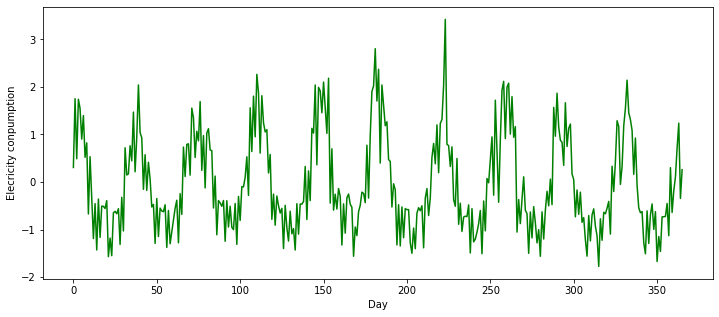

In [11]:
### BEGIN SOLUTION (do not delete this comment!)
plt.figure(figsize=(12, 5))

plt.plot(X, y_norm,c='g')

plt.xlabel('Day')
plt.ylabel('Elecricity conpumption')
plt.show()
    
### END SOLUTION (do not delete this comment!)

Plot mean and confidence interval of the prediction.

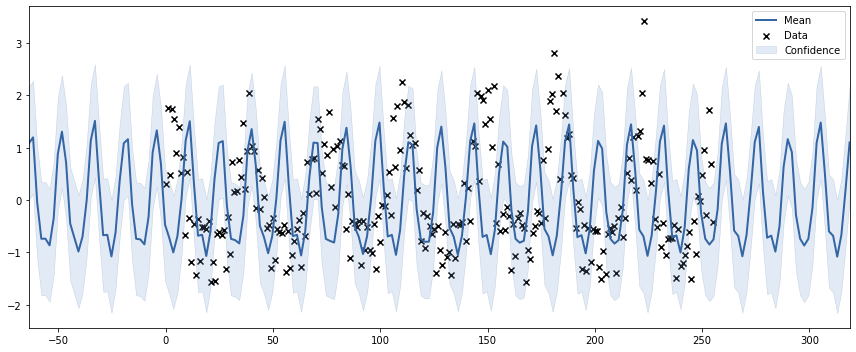

In [163]:
### BEGIN SOLUTION (do not delete this comment!)
input_dim = 1

ker_poly = Poly(input_dim, order=1)
ker_rbf = RBF(input_dim)
ker_period = StdPeriodic(input_dim)
ker_period.lengthscale.constrain_fixed(.2)
ker_rbf.lengthscale.constrain_fixed(1)

kernel = ker_poly * ker_rbf + ker_period

model = GPRegression(X_train, y_train_norm, kernel)
model.optimize()
# print(model)
model.plot(figsize=(12, 5));
### END SOLUTION (do not delete this comment!))

Inspect them on normality by scatter plot: plot predicted points/time series against true values.

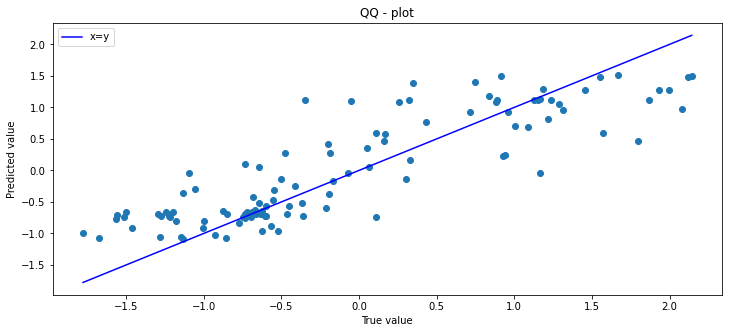

In [161]:
### BEGIN SOLUTION (do not delete this comment!)

prediction_mean, prediction_variance = model.predict(X_test)

plt.figure(figsize=(12, 5))

xmax, xmin = y_test_norm.min(), y_test_norm.max()
x = np.linspace(xmin, xmax, 5)
plt.plot(x, x, label='x=y', c='b')
plt.scatter(y_test_norm, prediction_mean)

plt.title('QQ - plot')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.legend()

### END SOLUTION (do not delete this comment!)

Estimate the prediction error with r2_score. R2-score accepted > 0.7 on test sample.

In [162]:
### BEGIN SOLUTION (do not delete this comment!)
print('R2-score: ', r2_score(y_test_norm, model.predict(X_test)[0]))
### END SOLUTION (do not delete this comment!)

R2-score:  0.7375899195117903


## Task 2 - MNIST, kMNIST component analysis and manifold learning. (5 pts.)

### Task 2.1. (1 pt)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimensionality, decompose the dataset on principle components and estimate the cumulative explained variance by each component.

You can either use the [proposed method](https://www.stat.berkeley.edu/~bickel/mldim.pdf) for the estimation of sample intrinsic dimension or any other method (convenient for you). For the first case, yoyu may use the code from [here](https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4)

1. Estimate the intrinsic dimensionality of the dataset. Provide the plot.
2. Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with **6** different set of components and corresponding explained variance. You can choose any digit from the dataset.

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

dg = datasets.load_digits()

scaler = StandardScaler().fit(dg.data)
data = scaler.transform(dg.data)

1) Estimate the intrinsic dimentionality of the dataset. Provide the plot.

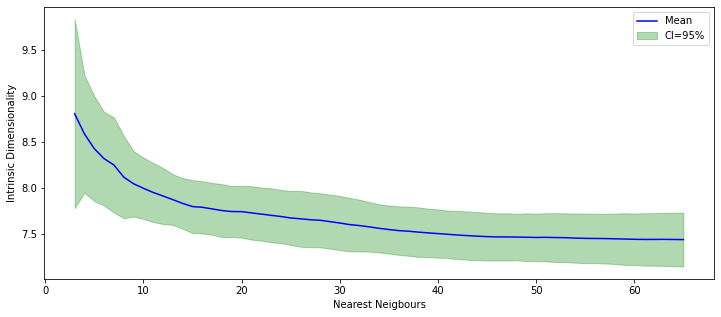

In [18]:
### BEGIN SOLUTION (do not delete this comment!)

def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k+1).fit(X)
    dist, ind = neighb.kneighbors(X) # distances between the samples and points
    dist = dist[:, 1:] # the distance between the first points to first points (as basis ) equals zero
    # the first non trivial point
    dist = dist[:, 0:k]# including points k-1
    assert dist.shape == (X.shape[0], k) # requirments are there is no equal points
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1]) # dinstance betveen the bayeasan statistics
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample
 
def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1): # in order to reduse the noise by eliminating of the nearest neibours 
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k
 
def repeated(func, X, nb_iter=100, random_state=None, mode='bootstrap', **func_kw):
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []
 
    iters = range(nb_iter) 
    for i in iters:
        if mode == 'bootstrap':# and each point we want to resample with repeating points to reduse the errors 
            #232 111 133 
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results


k1 = 3 # start of interval(included)
k2 = 65 # end of interval(included)
nb_iter = 15 # more iterations more accuracy
# intrinsic_dim_scale_interval gives better estimation
intdim_k_repeated = repeated(intrinsic_dim_scale_interval, 
                             data, 
                             mode='bootstrap', 
                             random_state = 42,
                             nb_iter=nb_iter, # nb_iter for bootstrapping
                             k1=k1, k2=k2)
intdim_k_repeated = np.array(intdim_k_repeated)

x = np.arange(k1, k2+1)

plt.figure(figsize=(12, 5))
plt.plot(x, np.mean(intdim_k_repeated, axis=0), 'b', label='Mean') # it is the mean walue
plt.fill_between(x, 
                 np.mean(intdim_k_repeated, axis=0) - 
                 2 * np.std(intdim_k_repeated, axis=0),
                 np.mean(intdim_k_repeated, axis=0) + 
                 2 * np.std(intdim_k_repeated, axis=0),
                 alpha=0.3,
                 label='CI=95%',
                 color='g')
plt.xlabel("Nearest Neigbours")
plt.ylabel("Intrinsic Dimensionality")
plt.legend()
plt.show()

### END SOLUTION (do not delete this comment!)

2) Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with 6 different set of components and corresponding explained variance. You can choose any digit from the dataset.

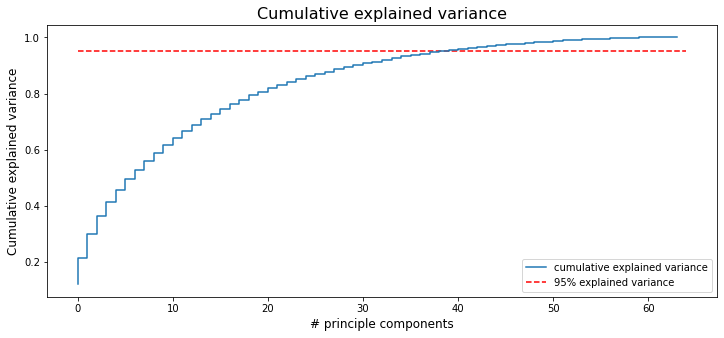

In [19]:
### BEGIN SOLUTION (do not delete this comment!)

pca = PCA(random_state=42).fit(data)

plt.figure(figsize=(12, 5))

plt.step(range(len(pca.components_)), np.cumsum(pca.explained_variance_ratio_), label='cumulative explained variance')
plt.hlines(y=0.95, xmin=0, xmax= len(pca.components_), colors='r', linestyles='dashed', label='95% explained variance')

plt.title('Cumulative explained variance', fontsize=16)
plt.xlabel('# principle components', fontsize=12)
plt.ylabel('Cumulative explained variance', fontsize=12)

plt.legend(loc='lower right')
plt.show()

### END SOLUTION (do not delete this comment!)

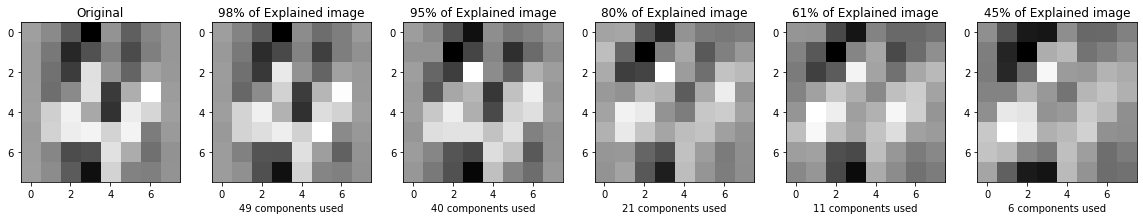

In [20]:
### BEGIN SOLUTION (do not delete this comment!)

thresholds = [.98, .95, .8, .61, .45]
fig, ax = plt.subplots(nrows=1, ncols=len(thresholds)+1, figsize=(20, 5))

ax[0].imshow(data[4].reshape((8, 8)),cmap=plt.cm.gray)
ax[0].set_title('Original')

for index, threshold in enumerate(thresholds):
    pca = PCA(threshold, random_state=42).fit(data)
    inv_data = pca.inverse_transform(pca.transform(data)[4])

    ax[index+1].imshow(inv_data.reshape((8, 8)),cmap=plt.cm.gray)
    ax[index+1].set_title('{}% of Explained image'.format(int(100*threshold)))
    ax[index+1].set_xlabel('{} components used'.format(pca.n_components_))

### END SOLUTION (do not delete this comment!)


### Task 2.2. (1 pt.)

Here we will visualize the decomposition in order to observe how data diverges across different manifold learning methods. We are to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracy on the new features. 

1. Calculate new features on the data with ICA, PCA and Isomap. **Choose the number of components according to your estimation of intrinsic dimension**. Calculate the classification accuracy on these features with `LogisticRegression` on `cross_val=5` with $3$ repeats. Use `RepeatedKFold` and fit the `random_seed = 42`.
2. Show that the `Isomap` gives a statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. Justify your results, write down 2-3 sentences.


In [9]:
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap

1) Calculate new features on the data with ICA, PCA and Isomap. Choose the number of components according to your estimation of intrinsic dimention. Calculate the classification accuracy on these features with LogisticRegression on cross_val=5 with  3  repeats. Use RepeatedKFold and fit the random_seed = 42.

In [21]:
### BEGIN SOLUTION (do not delete this comment!)

n_components = 11  # corresponds to 61% of explained variance
algs = [FastICA(n_components=n_components, tol=0.01, max_iter=10_000, random_state=42),
        PCA(n_components=n_components, random_state=42),
        Isomap(n_components=n_components)]
target = dg.target
n_splits = 5
n_repeats = 3 
cv = RepeatedKFold(n_repeats=n_repeats, n_splits=n_splits, random_state=42)
scores = np.zeros((len(algs), n_repeats*n_splits))

for index, alg in enumerate(algs):
    LR = LogisticRegression(max_iter=100_000)
    new_data = alg.fit_transform(data)

    scores[index] = (cross_val_score(LR, new_data,
                                     target, cv=cv, 
                                     n_jobs=-1))

for score, alg_name in zip(scores, ["PCA", "FastICA", "Isomap"]):
    print("{alg_name}: {score}".format(alg_name=alg_name, score=np.mean(score) ))

### END SOLUTION (do not delete this comment!)


PCA: 0.7523702672031364
FastICA: 0.8929676054884969
Isomap: 0.9567713814092645


2) Show that the `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. 

In [22]:
### BEGIN SOLUTION (do not delete this comment!)
for i, alg_name in enumerate(["PCA", "FastICA"]):
    statistic, pvalue = stats.ttest_ind(scores[i], scores[2], alternative='less')
    print(f"T test with alternative hypothesis that Isomap has greater accuracy than {alg_name}")
    print("Statistic: {:.2f} p_value: {:.4e}".format(statistic, pvalue))

### END SOLUTION (do not delete this comment!)

T test with alternative hypothesis that Isomap has greater accuracy than PCA
Statistic: -24.22 p_value: 1.2672e-20
T test with alternative hypothesis that Isomap has greater accuracy than FastICA
Statistic: -12.07 p_value: 6.4606e-13


### Task 2.3. (1 pt.)

3) Justify your results, write down 2-3 senteces.

*BEGIN SOLUTION (do not delete this comment!)*\
Isomap is a type of manifold learning which works very well for low amount of components\
*END SOLUTION (do not delete this comment!)*

### Task 2.4. kMNIST dimensionality reduction. (2 pts.)

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist. You are to engineer new features (by using any familiar to you method of Manifold Learning) to increase the classification accuracy. Use the `KNN` classifier with any hyperparameters you like.

1. __(2 pt.)__ Get accuracy on `test_set` more than 93%`. 

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

__Hint:__ Try to use dimensionality reduction methods, which yield better model performance on `MNIST`. These methods can compete with Autoencoders on `torch`. 

1) Get accuracy on test_set more than 93%.

In [2]:
import numpy as np

In [3]:
from sklearn.neighbors import KNeighborsClassifier

def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('kmnist-train-imgs.npz')
x_test = load('kmnist-test-imgs.npz')
y_train = load('kmnist-train-labels.npz')
y_test = load('kmnist-test-labels.npz')

# Reshape the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [5]:
### BEGIN SOLUTION (do not delete this comment!)

x_train_norm = x_train/255
x_test_norm = x_test/255

pca = PCA(n_components=60, random_state=42).fit(x_train_norm) #Isomap could not be used due to large 6000x6000 density matrix
x_train_red = pca.transform(x_train_norm)
x_test_red = pca.transform(x_test_norm)
KNN = KNeighborsClassifier().fit(x_train_red, y_train)
print(f"accuracy_score = {KNN.score(x_test_red, y_test)}")
### END SOLUTION (do not delete this comment!)

accuracy_score = 0.9342


## Task 3 - Clustering (2 pts.)

### Task 3.1. Explore KMeans and Gaussian Mixture algorithms (1 pt.)

Try **KMeans, Gaussian Mixture** and **two** more clustering algorithms from sklearn. 
To evaluate clustering performance use **two** clustering metrics: *silhouette score*
and *mutual information* or *adjusted mutual information*.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. Apply the algorithm with the true number of clusters and try out at least two **other variants** of the number of clusters: a smaller and a larger one than the true number.;
2. For each number of clusters **visualize the clustering result**, calculate the **clustering metrics** and plot them;

__NOTE:__ `sklearn.model_selection.GridSearchCV` does not support clustering methods, thus you suppose to do it manually.

In [8]:
import numpy as np

True number of clusters is 15


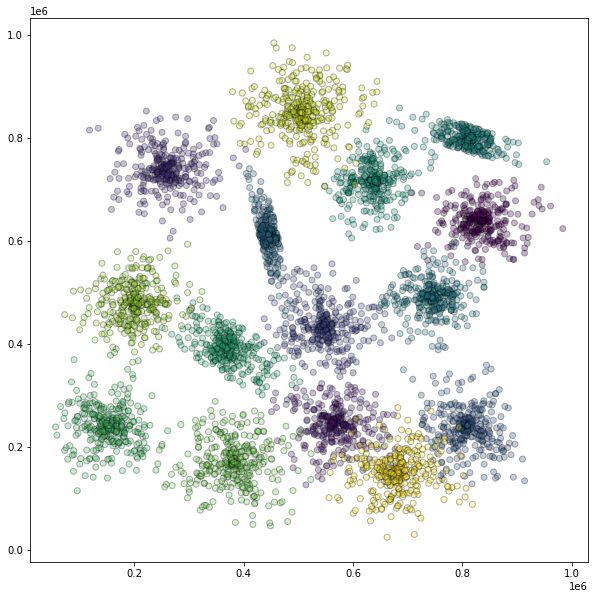

In [9]:
points, labels = np.loadtxt('clustering.txt'), np.loadtxt('clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')

plt.show()

In [11]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, mutual_info_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

1) For each algorithm your task is to try to find the parameters leading to the best performance for n_clusters=true_number_of_clusters

In [21]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.cluster import Birch, AgglomerativeClustering
from tqdm import tqdm

# scaling
scaler = StandardScaler()
points = scaler.fit_transform(points)

# Grid Search
n_clusters = true_n_of_clusters = np.max(labels)
algs = [KMeans(n_clusters=n_clusters, random_state=42),
        GaussianMixture(n_components=n_clusters, random_state=42),
        Birch(n_clusters=n_clusters),
        AgglomerativeClustering(n_clusters=n_clusters)]

param_grids = [{'init': ['k-means++', 'random'],  # KMeans
                'max_iter': [300, 600, 1000, 2000]},
               {'covariance_type': ['full', 'tied', 'diag', 'spherical'],  # GaussianMixture
                'init_params': ['kmeans', 'random'], 'max_iter': [100, 300, 500]},
               {'threshold': [0.05, 0.1, 0.2, 0.3],  # Birch
                'branching_factor': n_clusters*np.arange(4, 17, 4)},
               [{'affinity': ["euclidean"], 'linkage': ['ward']},  # AgglomerativeClustering
                {'affinity': ["euclidean", "l1", "l2", "manhattan", "cosine"], 
                 'linkage': ['complete', 'average', 'single']}]]

best_params = [{}]*len(algs)
for alg_index, alg in tqdm(enumerate(algs)):
    param_grid = ParameterGrid(param_grids[alg_index])
    best_score = None

    for params in param_grid:
        alg.set_params(**params)
        labels_pred = alg.fit_predict(points)
        score = silhouette_score(points, labels_pred)
        if(best_score is None or score > best_score):
            best_score = score
            best_params[alg_index] = params

### END SOLUTION (do not delete this comment!)

4it [00:44, 11.05s/it]


2) Apply the algorithm with the true number of clusters and try out at least two other variants of the number of clusters: a smaller and a larger one than the true number.;

 Do not forget that despite the plot picturing just the KMeans and GuassianMizture, you will need to ADDITIONALLY try put and plot two other clustering methods. 

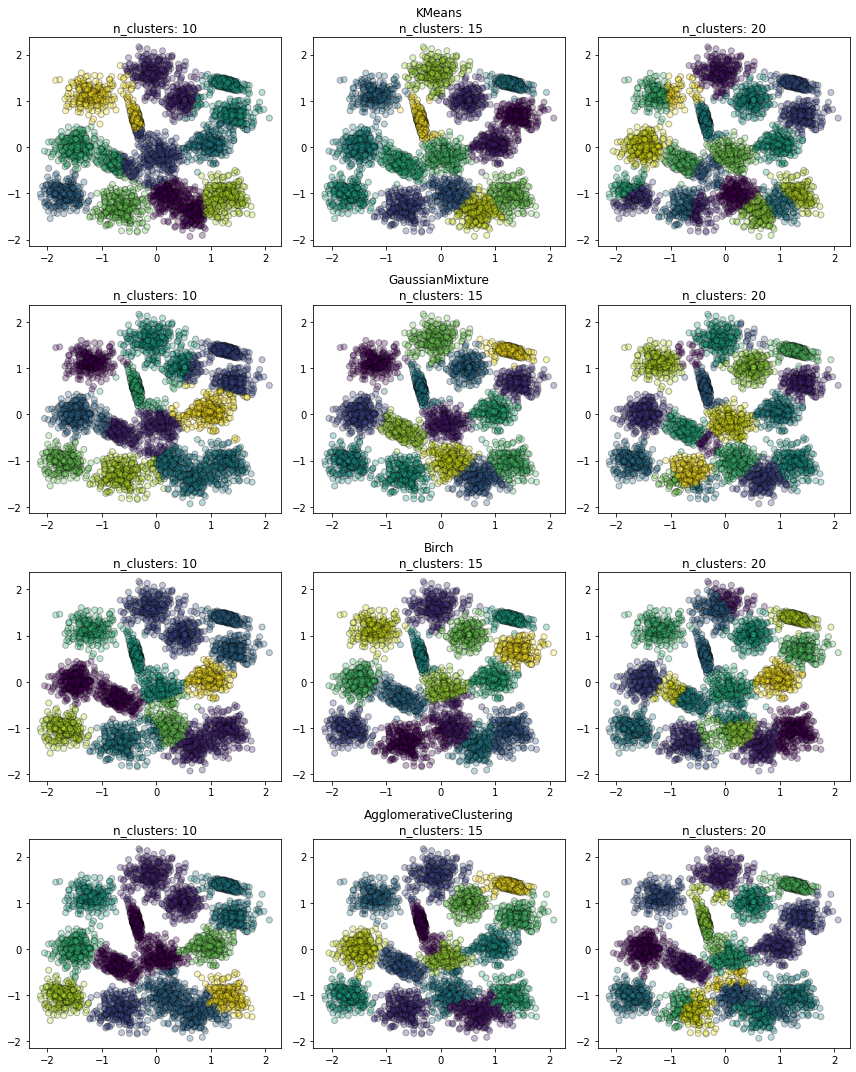

In [29]:
## BEGIN SOLUTION (do not delete this comment!)
algs = [KMeans(random_state=42), 
        GaussianMixture(random_state=42),
        Birch(),
        AgglomerativeClustering()]
n_clusters_arr = np.arange(10, 21, 1)  # it will be needed in the next task
all_labels_pred = [[],[],[],[]]  # it will be needed in the next task

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(12, 15), tight_layout=True) #rows are algorithms, cols are number of clusters
for alg_index, alg in enumerate(algs):
    alg.set_params(**best_params[alg_index])
    for n_clusters_index, n_clusters in enumerate(n_clusters_arr):
        if type(alg).__name__ == 'GaussianMixture':
            alg.set_params(**{'n_components' : n_clusters})
        else:
            alg.set_params(**{'n_clusters' : n_clusters})    
        labels_pred = alg.fit_predict(points)
        all_labels_pred[alg_index].append(labels_pred)
        if n_clusters % 5 == 0:
            n_col = n_clusters_index//5
            ax[alg_index, n_col].scatter(points[:,0], points[:,1], c=labels_pred, alpha=0.3, edgecolor='k')
            if(n_col == 1):
                ax[alg_index, n_col].set_title(f"{type(alg).__name__}\n n_clusters: {n_clusters}")
            else:
                ax[alg_index, n_col].set_title(f"n_clusters: {n_clusters}")
### END SOLUTION (do not delete this comment!)

2) For each number of clusters vizualize the clustering result, calculate the clustering metrics and plot them;


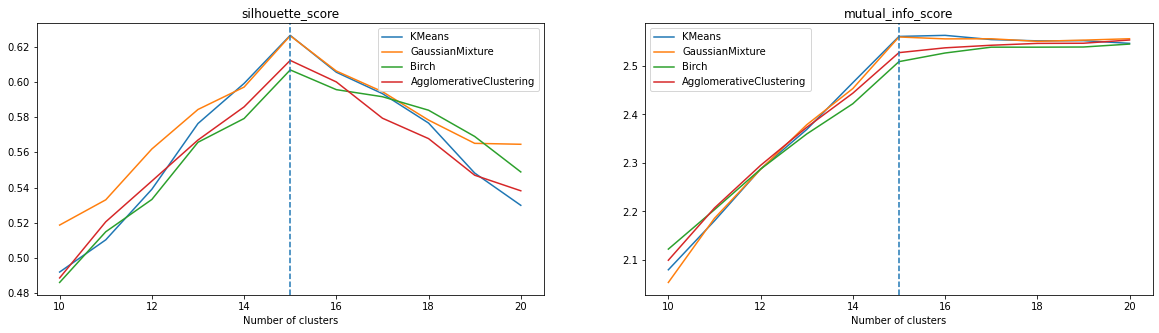

In [40]:
### BEGIN SOLUTION (do not delete this comment!)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

for alg_ind, alg in enumerate(algs):
    labels_pred = all_labels_pred[alg_ind]
    silhouette_scores = [silhouette_score(points, labels_pred[index]) for index in range(len(n_clusters_arr))]
    mutual_info_scores = [mutual_info_score(labels, labels_pred[index]) for index in range(len(n_clusters_arr))]

    ax[0].plot(n_clusters_arr, silhouette_scores, label = f"{type(alg).__name__}")
    ax[1].plot(n_clusters_arr, mutual_info_scores, label = f"{type(alg).__name__}")

ax[0].set_xlabel("Number of clusters")
ax[1].set_xlabel("Number of clusters")
ax[0].set_title("silhouette_score")
ax[1].set_title("mutual_info_score")
ax[0].axvline(15, ls='--')
ax[1].axvline(15, ls='--')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper left')

### END SOLUTION (do not delete this comment!)

### Task 3.2. Finding the Number of Clusters with Bootstrap. (1 pt.)
For a chosen algorithm find the best number of clusters using bootstrap. Based on your observations made at the previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.
1. Estimate variance of the clustering metric of your choice (i.e. *silhouette score*/*mutual information*/*adjusted mutual information*)and construct normal 95% **confidence interval (CI)**;
2. **Plot the metric** with the corresponding confidence intervals and show the best number of clusters.

__Hints:__ 
- you can choose bootstrap samples with any size, and sample number starting from `50`;
- you can use `scipy.stats.norm.interval()` to derive CI;

1) Estimate variance of the clustering metric of your choice (i.e. silhouette score/mutual information/adjusted mutual information)and construct normal 95% confidence interval (CI);

In [62]:
### BEGIN SOLUTION (do not delete this comment!)

n_iter = 50

mean_arr = []
variance_arr = []
conf_interval_arr = []

for n_clusters in tqdm(n_clusters_arr):
    scores_for_resampled = []

    for _ in range(n_iter):
        resampled_points = resample(points, random_state=42)

        alg = KMeans(n_clusters=n_clusters)
        labels_pred = alg.fit_predict(resampled_points)
        scores_for_resampled.append(silhouette_score(resampled_points, labels_pred))

    mean_arr.append(np.mean(scores_for_resampled))
    variance_arr.append(np.var(scores_for_resampled))
    conf_interval_arr.append(norm.interval(alpha=.95, 
                                           loc=mean_arr[-1],
                                           scale=variance_arr[-1] ** 0.5))

### END SOLUTION (do not delete this comment!)

100%|██████████| 11/11 [06:34<00:00, 35.82s/it]


2) Plot the metric with the corresponding confidence intervals and show the best number of clusters.

Number of clusters: 10
		 Variance: 2.7427376142153313e-05
		 Confidence interval: (0.5114047069533443, 0.531933821499254)
Number of clusters: 11
		 Variance: 5.104949112485638e-05
		 Confidence interval: (0.528619084765294, 0.5566265493398338)
Number of clusters: 12
		 Variance: 5.5702897216324805e-05
		 Confidence interval: (0.5529079772779059, 0.5821641141281374)
Number of clusters: 13
		 Variance: 9.012274750347576e-07
		 Confidence interval: (0.589217973741526, 0.5929392790143699)
Number of clusters: 14
		 Variance: 2.1451593898101798e-11
		 Confidence interval: (0.6188646282773539, 0.6188827837629819)
Number of clusters: 15
		 Variance: 5.617418760402412e-10
		 Confidence interval: (0.6348300362939953, 0.6349229428768549)
Number of clusters: 16
		 Variance: 2.102674423207452e-05
		 Confidence interval: (0.6106199081642768, 0.628594709648664)
Number of clusters: 17
		 Variance: 4.793061343168209e-05
		 Confidence interval: (0.5889225693343085, 0.6160609906405243)
Number of cluster

Text(0, 0.5, 'Silhouette score')

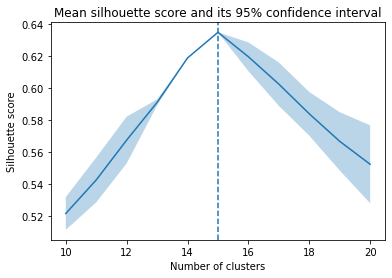

In [63]:
### BEGIN SOLUTION (do not delete this comment!)

for n_clusters, variance, confidence in zip(n_clusters_arr, variance_arr, conf_interval_arr):
    print(f"Number of clusters: {n_clusters}")
    print(f"\t\t Variance: {variance}")
    print(f"\t\t Confidence interval: {confidence}")
    
conf_interval_arr = np.array(conf_interval_arr)
plt.plot(n_clusters_arr, mean_arr)
plt.fill_between(n_clusters_arr, conf_interval_arr[:, 0], 
                 conf_interval_arr[:, 1], alpha=.3);

plt.axvline(x=15, ls='--')
plt.title('Mean silhouette score and its 95% confidence interval')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
### END SOLUTION (do not delete this comment!)

## Task 4. Practice with Different Anomaly Detection Algorithms. (2 pts)

### Task 4.1 (1 pt)

- Here we will use __fraud_dataset__ (creditcard.csv )
- Compute the __contamination__ (or impurity) on the **test** set as the ratio of anomaly objects to all the objects.  
- Predict the anomaly with any **three** Anomaly detection methods among ones from: https://scikit-learn.org/stable/modules/outlier_detection.html, note, we do not use true labels to fit anomaly detectors.
- Explore, how the `roc_auc_score` for anomaly detectors changes with `contamination` value, taking a grid `[0.1*contamination, 1*contamination, 10*contamination]`. Point out the best performing algorithm.

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score

data = pd.read_csv('creditcard.csv')

X = data.drop(columns="Class")
y = data["Class"]

# keep the split fixed
tt_split = train_test_split(X, y, test_size = 0.1, stratify=y, random_state= 42)
train_X, test_X, train_y, test_y = tt_split 

# delete the targets for training
train_y = 0

In [93]:
### BEGIN SOLUTION (do not delete this comment!)
  
# impurity estimation on test data
contamination = test_y.mean()
contamination

### END SOLUTION (do not delete this comment!)

0.01693743518838576

In [73]:
### BEGIN SOLUTION (do not delete this comment!)

# Choose three anomaly detection models
# import warnings
# warnings.filterwarnings('ignore')

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope

algs = [IsolationForest(random_state=42, n_jobs=-1),
        EllipticEnvelope(support_fraction=1, random_state=42),
        LocalOutlierFactor(novelty=True,n_jobs=-1)]

for i in [0.1, 1, 10]:
    # >>> your solution here <<<
    local_contamination = i*contamination
    for alg in algs:
        alg.set_params(**{'contamination' : local_contamination})

        alg.fit(train_X)
        labels_pred = alg.predict(test_X)

        labels_pred = np.array(labels_pred < 0, dtype=int)

        print("{:<20}: Contamination: {:.3f}\t ROC/AUC: {:.3f} Precision: {:.3f}".format(type(alg).__name__,
                                                                                        local_contamination,
                                                                                        roc_auc_score(test_y, labels_pred),
                                                                                        precision_score(test_y, labels_pred, average = 'micro')))
    
# warnings.filterwarnings('default')
### END SOLUTION (do not delete this comment!)

IsolationForest     : Contamination: 0.002	 ROC/AUC: 0.541 Precision: 0.984
EllipticEnvelope    : Contamination: 0.002	 ROC/AUC: 0.520 Precision: 0.983
LocalOutlierFactor  : Contamination: 0.002	 ROC/AUC: 0.499 Precision: 0.981
IsolationForest     : Contamination: 0.017	 ROC/AUC: 0.772 Precision: 0.986
EllipticEnvelope    : Contamination: 0.017	 ROC/AUC: 0.742 Precision: 0.985
LocalOutlierFactor  : Contamination: 0.017	 ROC/AUC: 0.500 Precision: 0.963
IsolationForest     : Contamination: 0.169	 ROC/AUC: 0.872 Precision: 0.848
EllipticEnvelope    : Contamination: 0.169	 ROC/AUC: 0.862 Precision: 0.848
LocalOutlierFactor  : Contamination: 0.169	 ROC/AUC: 0.506 Precision: 0.817


### Task 4.2 (1 pt)

The idea is to see when anomaly detection methods, trained with no labels, can facilitate the prediction of the classifier. Imagine a real case scenario: you have labelled only a small portion of the dataset and a bunch of unlabeled data. We will simulate the situation when __90%__ of data is unlabeled and we still desire to achieve good performance. 


As you can score your predictions only on the __10%__ of the sample, you better do it in cross validation to ensure the model stability.
1. Take your favorite classifier and estimate the performance on __test set__ using `StratifiedKFold(n_splits=10, random_state = 42)` with `roc_auc` and `precision_score`. You can use test set upsampling and other instruments to enforce your prediction. 

> Do not get confused, here we swap __train__ and __test__ and use __test__ as if it's the only data we have on our hands.

2. Try to enhance the classifier performance in  `roc_auc` or `precision_score` (or ideally both), building the ensemble, using __Anomaly detection__ methods from the previous task. You can fit __Anomaly detection__ methods on both  __training set__ and subset from __test set__ on the cross-validation fold.

__NOTE:__ try not to overfit, thus not adjust the `contamination` while training, and refit classifiers on each fold. 

__Hints:__ `sklearn.ensemble.VotingClassifier` does not support Anomaly detection methods, so you are to write it yourself. And `np.logical_and` or `np.logical_or` will suit for the trivial ensemble.

In [121]:
### BEGIN SOLUTION (do not delete this comment!)

# choose your favorite classifier, e.g. from sklearn.linear_model import LogisticRegression
#
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=10_000)
#
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = []
pr_scores = []

for method in ['no imbalance correction','upsampling','SMOTE', 'RandomUnderSampler']:
    print(method)
    for train_index, test_index in skf.split(test_X, test_y):
        local_train_X, local_test_X = test_X.iloc[train_index], test_X.iloc[test_index]
        local_train_y, local_test_y = test_y.iloc[train_index], test_y.iloc[test_index]
        if method == 'no imbalance correction':
            pass
        if method == 'upsampling':            
            train_data = local_train_X.join(local_train_y)
            train_data_minority = train_data[train_data.Class == 1]
            train_data_majority = train_data[train_data.Class == 0]
            train_data_minority_upsampled = resample(train_data_minority,
                                                     n_samples=len(train_data_majority),
                                                     random_state=42)
            train_data_up = pd.concat([train_data_majority, train_data_minority_upsampled])
            local_train_X = train_data_up.drop(columns='Class')
            local_train_y = train_data_up.Class
        elif method == 'SMOTE':
            over_sampler = SMOTE(random_state=42)
            local_train_X, local_train_y = over_sampler.fit_resample(local_train_X, local_train_y)
        elif method == 'RandomUnderSampler':
            sampler = RandomUnderSampler(random_state=42)
            local_train_X, local_train_y = sampler.fit_resample(local_train_X, local_train_y)

        clf.fit(local_train_X, local_train_y)
        y_pred = clf.predict(local_test_X)
        roc_auc_scores.append(roc_auc_score(local_test_y, y_pred))
        pr_scores.append(precision_score(local_test_y, y_pred))

    print('ROC/AUC mean: ', np.mean(roc_auc_scores), 'std: ', np.std(roc_auc_scores))    
    print('Precision mean: ', np.mean(pr_scores), 'std: ', np.std(pr_scores))
### END SOLUTION (do not delete this comment!)

no imbalance correction
ROC/AUC mean:  0.8566197183098592 std:  0.09104775947302887
Precision mean:  0.8871428571428572 std:  0.186093020408875
upsampling
ROC/AUC mean:  0.9041663577958982 std:  0.0904032113756134
Precision mean:  0.6127931096681096 std:  0.3119931449493005
SMOTE
ROC/AUC mean:  0.9198470060126844 std:  0.08581730961226196
Precision mean:  0.5731246993746993 std:  0.268268548366074
RandomUnderSampler
ROC/AUC mean:  0.9225911168766988 std:  0.0816725805508014
Precision mean:  0.49790639002810055 std:  0.27634137493296734


Try to enhance the classifier performance using Anomaly detection methods

In [7]:
### BEGIN SOLUTION (do not delete this comment!)

clf = LogisticRegression(max_iter=10_000, n_jobs=-1)
algs = [IsolationForest(n_jobs=-1, random_state=42),
        EllipticEnvelope(support_fraction=1, random_state=42)]

skf = StratifiedKFold(n_splits=10, random_state = 42, shuffle=True)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = [] 
pr_score = []

for train_index, test_index in skf.split(test_X, test_y):
    local_train_X, local_test_X = test_X.iloc[train_index], test_X.iloc[test_index]
    local_train_y, local_test_y = test_y.iloc[train_index], test_y.iloc[test_index]

    # >>> your solution here <<<
    y_pred_arr = []
    for alg in algs:
        alg.fit(local_train_X)
        y_pred = alg.predict(local_test_X)  # -1 is anomaly, +1 is not anomaly
        y_pred = np.array(y_pred < 0, dtype=int)  # +1 is anomaly, 0 is not anomaly
        y_pred_arr.append(y_pred)

    clf.fit(local_train_X, local_train_y)
    y_pred = clf.predict(local_test_X)
    y_pred_arr.append(y_pred)
    y_pred_arr = np.array(np.logical_and(y_pred_arr[2], np.logical_and(y_pred_arr[0], y_pred_arr[1]), dtype=int))

    roc_auc_scores.append(roc_auc_score(local_test_y, y_pred_arr))
    pr_scores.append(precision_score(local_test_y, y_pred_arr)) 
    
print('ROC/AUC mean: ', np.mean(roc_auc_scores), 'std: ', np.std(roc_auc_scores))    
print('Precision mean: ', np.mean(pr_scores), 'std: ', np.std(pr_scores))
### END SOLUTION (do not delete this comment!)

ROC/AUC mean:  0.7821485050654806 std:  0.10348600946339352
Precision mean:  0.9616666666666667 std:  0.08629728977333077


Write 1-2 sentences on your findings.

*BEGIN SOLUTION (do not delete this comment!)*\
Upsampling, SMOTE and undersampling can be used to increase ROC/AUC mean at the cost of precision mean.\
Anomaly detection can be used to increase Precision mean at the cost of ROC/AUC mean\
*END SOLUTION (do not delete this comment!)*